# KNN PyTorch with MNIST
- **Task**: Classification
- **Data**: MNIST Dataset
- **Model**: KNN
- **Distance**: L1

In [1]:
!pip install -q watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00


In [2]:
%load_ext watermark
%watermark -a 'Nguyen Van Sy Thinh' -v -p torch

Author: Nguyen Van Sy Thinh

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

torch: 2.3.0+cu121



## 1. Import Library

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 2. Data

### 2.1. MNIST Dataset

In [9]:
# Loading training data
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
        ]
    )

train_dataset = torchvision.datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)
# Loading test data
test_dataset = torchvision.datasets.MNIST(root='./data',
                              train=False,
                              transform=transform)

### 2.2. Data Information

In [10]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 60000
Number of testing samples: 10000


In [11]:
print(f"Datatype of the 1st training sample: {train_dataset[0][0].type()}")
print(f"Size of the 1st training sample: {train_dataset[0][0].size()}")

Datatype of the 1st training sample: torch.FloatTensor
Size of the 1st training sample: torch.Size([1, 28, 28])


### 2.3. Data Visualization

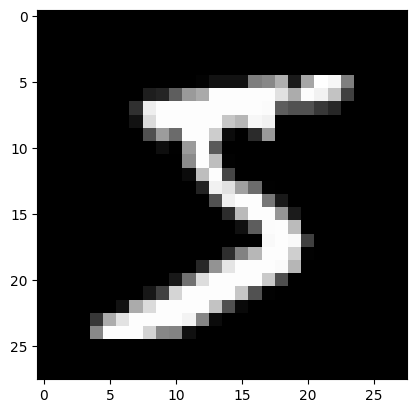

In [14]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()

In [15]:
print(f"Label of the 1st training sample: {train_dataset[0][1]}")

Label of the 1st training sample: 5


### 2.4. Load Dataset into TorchTensor

In [17]:
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# Get all training and testing data
X_train, y_train = next(iter(train_loader))
X_test, y_test = next(iter(test_loader))

# Flatten the images from 28x28 to 784 features
X_train = X_train.view(X_train.size(0), -1)
X_test = X_test.view(X_test.size(0), -1)

## 3. Model

In [18]:
class KNNClassifier:
    def __init__(self, k=3):
        """
        Initializes the KNN classifier with the specified number of neighbors.

        Args:
            k (int): The number of nearest neighbors to consider for classification.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fits the KNN classifier by storing the training data.

        Args:
            X_train (torch.Tensor): Training data features.
            y_train (torch.Tensor): Training data labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """
        Predicts the labels for the given test data using the KNN algorithm.

        Args:
            X_test (torch.Tensor): Test data features.

        Returns:
            torch.Tensor: Predicted labels for the test data.
        """
        y_pred = []  # List to store the predicted labels

        for test_point in X_test:
            # Calculate the Euclidean distance from the test point to all training points
            distances = torch.norm(self.X_train - test_point, dim=1)

            # Get the indices of the k nearest neighbors
            k_nearest_indices = distances.argsort()[:self.k]

            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[k_nearest_indices]

            # Find the most common label among the k nearest neighbors
            most_common = Counter(k_nearest_labels.tolist()).most_common(1)

            # Append the most common label to the predictions list
            y_pred.append(most_common[0][0])

        # Convert the predictions list to a torch tensor and return it
        return torch.tensor(y_pred)

In [19]:
knn = KNNClassifier(k=3)

In [20]:
knn.fit(X_train, y_train)

## 4. Inference

### 4.1. Scratch Model

In [21]:
# Predict and evaluate on a small test subset due to computational cost
X_test_subset = X_test[:1000]
y_test_subset = y_test[:1000]

y_pred = knn.predict(X_test_subset)
accuracy = (y_pred == y_test_subset).sum().item() / y_test_subset.size(0)

print(f'Accuracy on test subset: {accuracy * 100:.2f}%')

Accuracy on test subset: 96.50%


### 4.2. KNeighborsClassifier model from Sklearn

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten the images
X_train = X_train.view(X_train.size(0), -1).numpy()
X_test = X_test.view(X_test.size(0), -1).numpy()
y_test = y_test.numpy()

# Predict and evaluate on a small test subset due to computational cost
X_test_subset = X_test[:1000]
y_test_subset = y_test[:1000]

# Create and train the KNeighborsClassifier model from sklearn
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train.numpy())

# Predict and evaluate on the test set
y_pred_sklearn = knn_sklearn.predict(X_test_subset)
accuracy_sklearn = accuracy_score(y_test_subset, y_pred_sklearn)

print(f'Sklearn KNN Accuracy: {accuracy_sklearn * 100:.2f}%')

Sklearn KNN Accuracy: 96.20%


## 7. Conclusion
- **Scratch Model**: 96.50%
- **Sklearn Model**: 96.20%